In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We have 5 datasets for 1 bedroom, 2 bedrooms, 3 bedrooms, 4 bedrooms, 5 bedrooms.
- First I will load each csv, drop irrelevant columns and average the price per year.

In [2]:
bhk_1= pd.read_csv("City_Zhvi_1bedroom.csv", index_col = 0)

#### Add a column "Beds" to denote the number of bedroom in a house

In [3]:
bhk_1['Beds'] = 1

#### Average prices per year

In [5]:
initialVal = 8
for i in range(1996, 2021):
    bhk_1[str(i)] = bhk_1.iloc[:, initialVal: initialVal+12].mean(axis = 1)
    initialVal = initialVal+12

#### Drop unwanted coloumns

In [6]:
bhk_1.drop([i for i in bhk_1.columns if '-' in i], axis = 1, inplace = True)

In [7]:
bhk_1

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,138767.166667,...,415837.916667,417488.583333,440784.333333,482286.416667,532580.333333,565165.583333,594765.916667,613355.250000,605160.916667,283797.048611
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,113276.833333,...,282014.666667,277086.333333,337208.416667,380398.666667,408002.000000,445619.916667,482102.500000,525743.250000,532550.333333,241788.222222
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,69134.416667,...,62348.166667,63665.083333,69344.416667,78112.833333,87412.666667,93736.750000,97970.666667,101363.000000,105217.916667,76384.715278
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,96733.083333,...,182225.500000,170991.166667,190467.583333,209554.333333,215736.583333,224578.333333,234568.166667,239684.916667,238917.083333,154580.701389
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,54815.250000,...,57432.166667,54678.333333,56979.333333,60628.916667,65285.833333,69526.666667,76805.666667,83223.583333,90706.916667,61102.756944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14922,46631,29449,Mount Charleston,City,NV,NV,Las Vegas-Henderson-Paradise,Clark County,1,NaN,...,NaN,NaN,NaN,NaN,203716.000000,211906.666667,227834.500000,255596.416667,265272.416667,205659.500000
14923,36413,29449,Washington,City,CA,CA,Truckee-Grass Valley,Nevada County,1,NaN,...,NaN,NaN,NaN,NaN,180751.666667,192271.333333,231396.000000,262920.500000,262181.750000,192778.500000
14924,47188,29449,Poncha Springs,City,CO,CO,NaN,Chaffee County,1,NaN,...,203492.583333,205260.500000,210617.083333,217036.916667,236646.250000,256527.333333,281421.833333,301017.583333,318882.333333,242772.000000
14925,50522,29449,Oriskany Falls,City,NY,NY,Utica-Rome,Oneida County,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,92426.363636,81996.833333,84077.916667,62850.500000


In [8]:
bhk_1.columns[0:9]

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', 'Beds'],
      dtype='object')

#### Move the columns 1996, 1997...2020 into rows under columns name "Year" 

In [9]:
bhk_1 = bhk_1.melt(id_vars = bhk_1.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

#### Repeating the same steps for other 4 CSVs and merge them

In [10]:
bhk_2= pd.read_csv("City_Zhvi_2bedroom.csv",index_col = 0)

In [11]:
bhk_2['Beds'] = 2

In [12]:
bhk_2

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,221378.0,220807.0,...,757140.0,755798.0,754176.0,752930.0,751581.0,750470.0,749923.0,749112.0,748076.0,2
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,160588.0,160470.0,...,630983.0,632244.0,634144.0,637111.0,639818.0,644225.0,649077.0,656189.0,663476.0,2
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,68930.0,68945.0,...,140043.0,140703.0,141259.0,142048.0,142366.0,142724.0,142883.0,143623.0,144587.0,2
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,106560.0,106422.0,...,231893.0,231898.0,231586.0,231307.0,231035.0,230780.0,230781.0,230826.0,231117.0,2
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,59783.0,59855.0,...,121916.0,122386.0,123370.0,124026.0,124762.0,124743.0,125185.0,125329.0,125778.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23391,52073,29449,Fort Montgomery,City,NY,NY,New York-Newark-Jersey City,Orange County,NaN,NaN,...,197946.0,200007.0,204227.0,207895.0,211743.0,212810.0,214751.0,215001.0,215191.0,2
23392,31730,29449,Gerlach,City,NV,NV,Reno,Washoe County,NaN,NaN,...,163001.0,164014.0,165600.0,167405.0,168617.0,169376.0,169220.0,167841.0,164301.0,2
23393,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,NaN,NaN,...,57037.0,57300.0,57463.0,57708.0,57828.0,58119.0,58116.0,58092.0,58124.0,2
23394,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,NaN,NaN,...,77991.0,78375.0,78344.0,78603.0,78894.0,79757.0,80651.0,81850.0,82846.0,2


In [14]:
initialVal = 8
for i in range(1996, 2021):
    bhk_2[str(i)] = bhk_2.iloc[:, initialVal: initialVal+12].mean(axis = 1)
    initialVal = initialVal+12


In [15]:
bhk_2.drop([i for i in bhk_2.columns if '-' in i], axis = 1, inplace = True)

In [16]:
bhk_2 = bhk_2.melt(id_vars = bhk_2.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [17]:
bhk_2

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2,1996,219981.916667
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,1996,159967.083333
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2,1996,68815.333333
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2,1996,106893.166667
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2,1996,60410.083333
...,...,...,...,...,...,...,...,...,...,...,...
584895,52073,29449,Fort Montgomery,City,NY,NY,New York-Newark-Jersey City,Orange County,2,2020,161236.250000
584896,31730,29449,Gerlach,City,NV,NV,Reno,Washoe County,2,2020,125341.000000
584897,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,2,2020,43583.500000
584898,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,2,2020,61337.250000


In [18]:
mergedDataSet = pd.concat([bhk_1, bhk_2])

In [19]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.166667
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113276.833333
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.416667
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.083333
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.250000
...,...,...,...,...,...,...,...,...,...,...,...
584895,52073,29449,Fort Montgomery,City,NY,NY,New York-Newark-Jersey City,Orange County,2,2020,161236.250000
584896,31730,29449,Gerlach,City,NV,NV,Reno,Washoe County,2,2020,125341.000000
584897,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,2,2020,43583.500000
584898,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,2,2020,61337.250000


In [20]:
bhk_3= pd.read_csv("City_Zhvi_3bedroom.csv",index_col = 0)

In [21]:
bhk_3['Beds'] = 3

In [ ]:
bhk_3

In [22]:
initialVal = 8
for i in range(1996, 2021):
    bhk_3[str(i)] = bhk_3.iloc[:, initialVal: initialVal+12].mean(axis = 1)
    initialVal = initialVal+12

In [23]:
bhk_3.drop([i for i in bhk_3.columns if '-' in i], axis = 1, inplace = True)

In [24]:
bhk_3 = bhk_3.melt(id_vars = bhk_3.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [25]:
bhk_3

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,3,1996,204849.083333
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,3,1996,182318.583333
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1996,85441.916667
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,3,1996,123532.583333
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,3,1996,86622.083333
...,...,...,...,...,...,...,...,...,...,...,...
643370,16604,29449,May,City,OK,OK,NaN,Harper County,3,2020,58359.500000
643371,27113,29449,Simpson,City,WV,WV,Clarksburg,Taylor County,3,2020,55355.500000
643372,29846,29449,Barwick,City,GA,GA,Valdosta,Brooks County,3,2020,58927.000000
643373,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,3,2020,87015.500000


In [26]:
mergedDataSet = pd.concat([mergedDataSet, bhk_3])

In [27]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.166667
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113276.833333
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.416667
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.083333
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.250000
...,...,...,...,...,...,...,...,...,...,...,...
643370,16604,29449,May,City,OK,OK,NaN,Harper County,3,2020,58359.500000
643371,27113,29449,Simpson,City,WV,WV,Clarksburg,Taylor County,3,2020,55355.500000
643372,29846,29449,Barwick,City,GA,GA,Valdosta,Brooks County,3,2020,58927.000000
643373,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,3,2020,87015.500000


In [28]:
bhk_4= pd.read_csv("City_Zhvi_4bedroom.csv",index_col = 0)

In [29]:
bhk_4['Beds'] = 4

In [30]:
bhk_4

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,233213.0,232632.0,...,811868.0,810783.0,809669.0,809085.0,807989.0,807780.0,807388.0,806795.0,805518.0,4
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,225449.0,225620.0,...,830215.0,832774.0,836060.0,840487.0,844371.0,850407.0,856403.0,865482.0,874732.0,4
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,132240.0,132208.0,...,234391.0,234813.0,235069.0,235604.0,236122.0,236717.0,236815.0,237271.0,238273.0,4
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,148277.0,148122.0,...,302479.0,302686.0,302717.0,302727.0,302718.0,302851.0,303337.0,304217.0,305303.0,4
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,140643.0,140525.0,...,248051.0,248583.0,249442.0,250020.0,250747.0,250791.0,251210.0,251167.0,251646.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,50926,29449,Beaver Bay,City,MN,MN,NaN,Lake County,NaN,NaN,...,235447.0,234458.0,234452.0,236101.0,236641.0,235954.0,233520.0,231665.0,229446.0,4
23459,21919,29449,Lake Park,City,GA,GA,Valdosta,Lowndes County,114749.0,115792.0,...,205882.0,205850.0,206057.0,206820.0,206680.0,206862.0,205536.0,205101.0,203280.0,4
23460,22166,29449,Haskins,City,OH,OH,Toledo,Wood County,NaN,NaN,...,209351.0,208369.0,209197.0,211379.0,215042.0,218303.0,220842.0,222658.0,225138.0,4
23461,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,NaN,NaN,...,330878.0,332777.0,332385.0,333127.0,333470.0,334726.0,336601.0,338190.0,340703.0,4


In [31]:
initialVal = 8
for i in range(1996, 2021):
    bhk_4[str(i)] = bhk_4.iloc[:, initialVal: initialVal+12].mean(axis = 1)
    initialVal = initialVal+12

In [32]:
bhk_4.drop([i for i in bhk_4.columns if '-' in i], axis = 1, inplace = True)

In [33]:
bhk_4 = bhk_4.melt(id_vars = bhk_4.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [34]:
mergedDataSet = pd.concat([mergedDataSet, bhk_4])

In [35]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.166667
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113276.833333
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.416667
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.083333
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.250000
...,...,...,...,...,...,...,...,...,...,...,...
586570,50926,29449,Beaver Bay,City,MN,MN,NaN,Lake County,4,2020,173658.750000
586571,21919,29449,Lake Park,City,GA,GA,Valdosta,Lowndes County,4,2020,149998.500000
586572,22166,29449,Haskins,City,OH,OH,Toledo,Wood County,4,2020,166765.983333
586573,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,4,2020,253874.500000


In [36]:
bhk_5= pd.read_csv("City_Zhvi_5BedroomOrMore.csv",index_col = 0)

In [37]:
bhk_5['Beds'] = 5

In [38]:
bhk_5

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,258989.0,258283.0,...,1052158.0,1050936.0,1049761.0,1049042.0,1047797.0,1047948.0,1048209.0,1048544.0,1048050.0,5
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,419938.0,420685.0,...,1600091.0,1602572.0,1606059.0,1611326.0,1616454.0,1625317.0,1632646.0,1645434.0,1658508.0,5
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,241920.0,241541.0,...,400303.0,400679.0,400727.0,401211.0,401360.0,401643.0,401345.0,401709.0,402876.0,5
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,164589.0,164439.0,...,344225.0,344696.0,344855.0,345093.0,345215.0,345422.0,346043.0,347066.0,348428.0,5
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,203582.0,203338.0,...,332293.0,332731.0,333466.0,333994.0,334721.0,334730.0,335211.0,335103.0,335631.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18765,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,NaN,NaN,...,387901.0,389590.0,390555.0,392740.0,394341.0,396641.0,398649.0,400238.0,403231.0,5
18766,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,NaN,NaN,...,96834.0,95862.0,94489.0,93359.0,92528.0,91579.0,90059.0,87820.0,85300.0,5
18767,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,NaN,NaN,...,305652.0,306736.0,307736.0,308640.0,309440.0,310130.0,310708.0,311510.0,311726.0,5
18768,54589,29449,Strawberry Point,City,IA,IA,NaN,Clayton County,NaN,NaN,...,118453.0,118903.0,119267.0,119736.0,119871.0,120179.0,120198.0,120384.0,120536.0,5


In [39]:
initialVal = 8
for i in range(1996, 2021):
    bhk_5[str(i)] = bhk_5.iloc[:, initialVal: initialVal+12].mean(axis = 1)
    initialVal = initialVal+12

In [40]:
bhk_5.drop([i for i in bhk_5.columns if '-' in i], axis = 1, inplace = True)

In [41]:
bhk_5

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,5,259027.666667,...,6.437543e+05,6.434840e+05,6.756509e+05,7.384385e+05,8.116852e+05,8.838193e+05,9.562752e+05,1.024789e+06,1.051666e+06,498035.138889
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,5,425536.250000,...,1.009250e+06,1.008093e+06,1.170036e+06,1.278604e+06,1.340959e+06,1.417881e+06,1.492097e+06,1.587744e+06,1.603799e+06,804353.145833
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,5,240446.500000,...,2.923198e+05,2.970180e+05,3.239391e+05,3.547402e+05,3.825678e+05,3.873508e+05,3.899022e+05,3.929740e+05,4.005148e+05,269186.041667
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,5,164596.000000,...,2.576747e+05,2.443348e+05,2.576131e+05,2.729101e+05,2.884364e+05,3.081306e+05,3.255767e+05,3.389230e+05,3.439560e+05,226516.958333
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,5,201949.000000,...,2.559520e+05,2.595338e+05,2.698333e+05,2.829691e+05,2.949926e+05,3.065231e+05,3.162454e+05,3.237665e+05,3.321232e+05,223591.826389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18765,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,5,NaN,...,3.179482e+05,3.124368e+05,3.079241e+05,3.275837e+05,3.704517e+05,3.827428e+05,3.935062e+05,3.956535e+05,3.898344e+05,300530.750000
18766,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,5,NaN,...,NaN,NaN,NaN,NaN,8.872192e+04,8.856008e+04,9.524450e+04,9.404275e+04,9.475442e+04,65796.000000
18767,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.945221e+05,3.044978e+05,233487.250000
18768,54589,29449,Strawberry Point,City,IA,IA,NaN,Clayton County,5,NaN,...,8.824042e+04,9.242183e+04,9.584000e+04,9.874950e+04,9.898825e+04,1.025502e+05,1.071459e+05,1.146362e+05,1.183606e+05,90280.750000


In [42]:
bhk_5 = bhk_5.melt(id_vars = bhk_5.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [43]:
mergedDataSet = pd.concat([mergedDataSet, bhk_5],ignore_index = True)

In [44]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.166667
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113276.833333
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.416667
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.083333
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.250000
...,...,...,...,...,...,...,...,...,...,...,...
2657270,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,5,2020,300530.750000
2657271,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,5,2020,65796.000000
2657272,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,5,2020,233487.250000
2657273,54589,29449,Strawberry Point,City,IA,IA,NaN,Clayton County,5,2020,90280.750000


#### Get the number of null values for each attribute

In [48]:
mergedDataSet.isnull().sum().sort_values()

RegionID         0
SizeRank         0
RegionName       0
RegionType       0
StateName        0
State            0
Metro            0
CountyName       0
Beds             0
Year             0
Average Price    0
dtype: int64

#### Drop rows with null values

In [49]:
mergedDataSet=mergedDataSet.dropna()


In [50]:
mergedDataSet.isnull().sum().sort_values()

RegionID         0
SizeRank         0
RegionName       0
RegionType       0
StateName        0
State            0
Metro            0
CountyName       0
Beds             0
Year             0
Average Price    0
dtype: int64

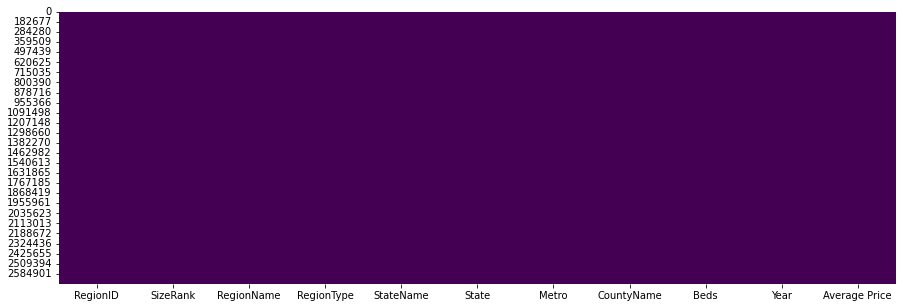

In [51]:
plt.subplots(figsize= (15,5))
sns.heatmap(mergedDataSet.isnull(), cbar= False, cmap= "viridis")
plt.show()

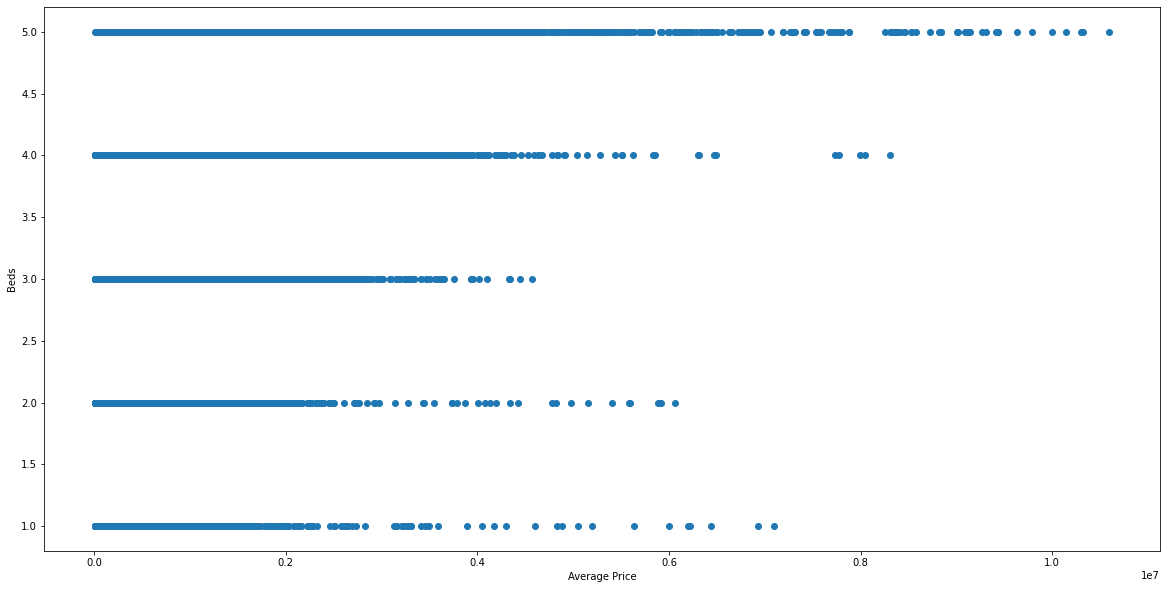

In [52]:
plt.subplots(figsize= (20,10))
plt.scatter(data= mergedDataSet, x= "Average Price", y= "Beds")
plt.xlabel('Average Price')
plt.ylabel('Beds')
plt.show()